In [121]:
import importlib
import niftiutils.helper_fxns as hf
import niftiutils.transforms as tr
import niftiutils.registration as regs
import os
import numpy as np
import pandas as pd
import spect_fxns as sf
import skimage.feature
import skimage.transform
%matplotlib inline

In [232]:
importlib.reload(hf)
importlib.reload(tr)
importlib.reload(regs)
importlib.reload(sf)

<module 'spect_fxns' from 'C:\\Users\\Clinton\\Documents\\spect-assessment\\spect_fxns.py'>

In [35]:
patient_id = 3

In [34]:
base_dir = "Z:\\Isa"

In [19]:
patient_folder = "Z:\\Isa\\binary etc\\3-S"

In [20]:
segs_dir = os.path.join(patient_folder, "BL-segs")

In [21]:
mri_dir = os.path.join(patient_folder, [x for x in os.listdir(patient_folder) if ('MRI' in x and 'BL' in x) or df.loc[patient_id]['BL-MRI'] in x][0])

In [ ]:
mri_dir = os.path.join(patient_folder, [x for x in os.listdir(patient_folder) if ('MRI' in x and 'BL' in x) or df.loc[patient_id]['BL-MRI'] in x][0])

In [60]:
mri_path = os.path.join(mri_dir, "vibe_fs_axial_dynamic_post_16sec_13")
ct_path = os.path.join(base_dir, "spect", df.loc[patient_id]["SPECT"], "CT")
fused_path = os.path.join(base_dir, "spect", df.loc[patient_id]["SPECT"], "Fused")
spect_path = os.path.join(base_dir, "spect", df.loc[patient_id]["SPECT"], "SPECT")

In [112]:
fused_reg_path = os.path.join(nii_path, "fused-reg.nii")
spect_reg_path = os.path.join(nii_path, "spect-reg.nii")

fused_reg2_path = os.path.join(nii_path, "fused-reg2.nii")
spect_reg2_path = os.path.join(nii_path, "spect-reg2.nii")
spect_reg3_path = os.path.join(nii_path, "spect-reg3.nii")

In [110]:
nii_path = os.path.join(base_dir, "nii_files", str(patient_id))

mri_nii_path = os.path.join(nii_path, "blmri.nii")
ct_nii_path = os.path.join(nii_path, "ct.nii")
spect_nii_path = os.path.join(nii_path, "spect.nii")
fused_nii_path = os.path.join(nii_path, "fused.nii")

ct_mr_transform_path = os.path.join(nii_path, "ct-mr.txt")
fused_ct_transform_path = os.path.join(nii_path, "fused-ct.txt")
spect_fused_transform_path = os.path.join(nii_path, "spect-fused.txt")
ct_reg_path = os.path.join(nii_path, "ct-reg.nii")

In [54]:
mri_img, mri_dims = hf.dcm_load(mri_path, True, True)
hf.save_nii(mri_img, mri_nii_path, mri_dims)

In [173]:
ct_img, ct_dims = hf.dcm_load(ct_path, True, True)
ct_img = ct_img[:,:,ct_img.shape[2]//5:]
ww = 400
wl = 60
ct_img[ct_img < wl-ww/2] = wl-ww/2
ct_img[ct_img > wl+ww/2] = wl+ww/2
ct_img, _ = tr.rescale_img(ct_img, mri_dims, ct_dims)
ct_dims = mri_dims
hf.save_nii(ct_img, ct_nii_path, ct_dims)

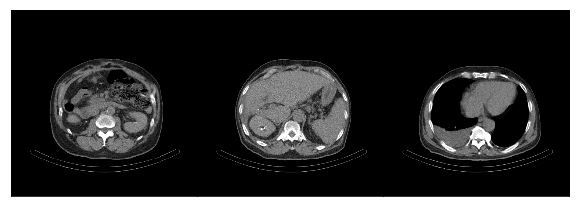

In [253]:
hf.draw_slices(ct_img[:,::-1,30:], width=10)

In [294]:
#settings = {'mode': 'affine', 'iterations': '25'}
settings = {'iterations': '30', 'resolution': '3.0'}
regs.reg_bis(mri_nii_path, ct_nii_path, ct_mr_transform_path, ct_reg_path, linear=False, settings=settings)

('Z:\\Isa\\nii_files\\3\\ct-reg.nii', 'Z:\\Isa\\nii_files\\3\\ct-mr.txt')

In [273]:
fused_img, _ = hf.dcm_load_special(fused_path)
fused_img = np.min(fused_img, axis=3).astype('float64')
fused_img, _ = tr.rescale_img(fused_img, ct_img.shape)
hf.save_nii(fused_img, fused_nii_path, ct_dims, flip_y=True, flip_z=True)

In [274]:
settings = {'mode': 'affine', 'numberofbins': '8', 'iterations': '25'}
regs.reg_bis(ct_nii_path, fused_nii_path, fused_ct_transform_path, fused_reg_path, settings=settings)
regs.transform_bis(fused_reg_path, fused_ct_transform_path, mri_nii_path, fused_reg2_path)

'Z:\\Isa\\nii_files\\3\\fused-reg2.nii'

In [290]:
spect_img, spect_dims = hf.dcm_load_special(spect_path)

In [287]:
spect_img, spect_dims = hf.dcm_load_special(spect_path)
spect_img = spect_img.astype('float64')
#spect_img, _ = tr.rescale_img(spect_img, ct_img.shape)
hf.save_nii(spect_img, spect_nii_path, spect_dims, flip_y=True)

In [285]:
fused_img, _ = hf.dcm_load_special(fused_path)
fused_img = (np.max(fused_img, axis=3) - np.min(fused_img, axis=3)).astype('float64')
fused_img, _ = tr.rescale_img(fused_img, ct_img.shape)
hf.save_nii(fused_img, fused_nii_path, ct_dims, flip_y=True, flip_z=True)

In [288]:
settings = {'mode': 'affine'}
regs.reg_bis(fused_nii_path, spect_nii_path, spect_fused_transform_path, spect_reg_path, settings=settings)
#regs.transform_bis(spect_reg_path, fused_ct_transform_path, ct_nii_path, spect_reg2_path)
#regs.transform_bis(spect_reg2_path, ct_mr_transform_path, mri_nii_path, spect_reg3_path)

('Z:\\Isa\\nii_files\\3\\spect-reg.nii',
 'Z:\\Isa\\nii_files\\3\\spect-fused.txt')

In [289]:
regs.transform_bis(spect_reg_path, fused_ct_transform_path, ct_nii_path, spect_reg2_path)
regs.transform_bis(spect_reg2_path, ct_mr_transform_path, mri_nii_path, spect_reg3_path)

'Z:\\Isa\\nii_files\\3\\spect-reg3.nii'

In [13]:
xls_fn = r"Z:\Isa\T1-Response-Desktop.xlsx"
writer = pd.ExcelWriter(xls_fn)

df = pd.read_excel(xls_fn, index_col=0, dtype={"index": np.int32})
df.dropna(subset=["high thresh"], inplace=True)
df = df[df["Segmented"] == "Yes"]
patient_ids = df.index.values

In [4]:
for patient_id in patient_ids:
    sf.check_dcm_paths(patient_id, df)

In [5]:
dcm_paths = {}
nii_paths = {}
mask_paths = {}

for patient_id in patient_ids:
    sf.set_paths(patient_id, df, dcm_paths, nii_paths, mask_paths)

In [6]:
patient_id = 3
nii_p = nii_paths[patient_id]

In [342]:
for patient_id in [3]:#patient_ids:
    sf.save_niis(patient_id, dcm_paths, nii_paths)

In [ ]:
for patient_id in [3]:#patient_ids:
    sf.reg_all_niis(patient_id, nii_paths)

nii_p = nii_paths[patient_id]

ct_img, dims = hf.dcm_load(dcm_paths[patient_id]['ct'])
hf.save_nii(ct_img, nii_p['ct'], dims)

blmri_art, dims = hf.dcm_load(dcm_paths[patient_id]['blmri-art'])
hf.save_nii(blmri_art, nii_p['blmri-art'], dims)

fused_img = hf.get_spect_series(dcm_paths[patient_id]['fused'])

#spect_head = hf.get_spect_series(dcm_paths[3]["fused"], just_header=True)

for accnum in ['E104191217','E102337624','E103524930','E101144756','E103674058','E101216308','E103467396','E102059019','E103283145','E101355783','E105722892','12973122','E100860542','E103113772','E102125758','E101783139','E104383547','E104114246','E102832434','E102446873','E102974401']:
    if not os.path.exists('Z:\\Isa\\spect\\'+accnum):
        print(accnum)

for patient_id in patient_ids:
    sf.get_stats(patient_id, nii_paths, mask_paths)

In [43]:
# register ct to blmri-art
out_img_path, blct_transform_path = sf.reg_nii("blmri-art", "ct", nii_p, overwrite=True)
print(out_img_path, blct_transform_path)
img = hf.ni_load(out_img_path)
hf.save_nii(img[0], out_img_path, img[1])
hf.plot_section_auto(img[0])

Z:\Isa\3\ct-reg.nii Z:\Isa\3\ct_blmri-art_xform.txt


Z:\Isa\3\fused-reg.nii Z:\Isa\3\fused_ct_xform.txt


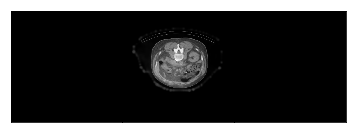

In [45]:
# register fused to ct
out_img_path, ctfused_transform_path = sf.reg_nii("ct", "fused", nii_p, overwrite=True)
print(out_img_path, ctfused_transform_path)
img = hf.ni_load(out_img_path)
hf.save_nii(img[0], out_img_path, img[1])
hf.plot_section_auto(img[0])

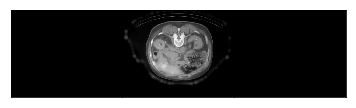

In [46]:
out_img_path = sf.transform_nii(out_img_path, [blct_transform_path], [nii_p["blmri-art"]],
                 out_img_path=hf.add_to_filename(nii_p['fused'],'-superreg'))
img = hf.ni_load(out_img_path)
hf.save_nii(img[0], out_img_path, img[1])
hf.plot_section_auto(img[0])

In [596]:
sf.transform_nii(temp_file, [ctfused_transform_path], hf.ni_load(nii_p["ct"]), out_img_path=temp_file, overwrite=True)
sf.transform_nii(temp_file, [blct_transform_path], hf.ni_load(nii_p["blmri-art"]), out_img_path=base_dir+"spect-reg.nii")

True

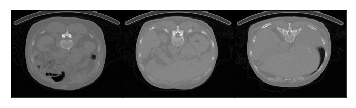

In [51]:
ct_reg,_=hf.ni_load(hf.add_to_filename(nii_p['ct'],'-reg'))
hf.plot_section_auto(ct_reg)
hf.create_threshold_mask(ct_reg, nii_p["base"]+"ct_reg_mask.ids",
                         np.mean(ct_reg), mask_paths[patient_id]["tumor-bl"])

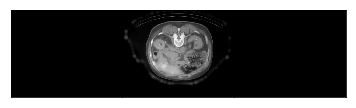

In [52]:
fused_reg,_=hf.ni_load(hf.add_to_filename(nii_p['fused'],'-superreg'))
hf.plot_section_auto(fused_reg)
hf.create_threshold_mask(fused_reg, nii_p["base"]+"fused_superreg_mask.ids",
                         np.mean(fused_reg), mask_paths[patient_id]["tumor-bl"])

In [601]:
spect_reg,_=hf.ni_load(hf.add_to_filename(nii_paths[patient_id]['spect'],'-reg'))
hf.plot_section_auto(spect_reg)
hf.create_threshold_mask(spect_reg, nii_paths[patient_id]["base"]+"spect-hi-thresh.ids",
                         255 * df.loc[patient_id,"high thresh"]/df.loc[patient_id, 'max intensity'],
                         mask_paths[patient_id]["tumor-bl"])

True

In [527]:
temp_path = "Z:\\temp.nii"

In [588]:
sf.reg_niis("fused-ch1", "spect", nii_p, out_img_path=temp_path, overwrite=True)

('Z:\\temp.nii', 'Z:\\Isa\\3\\spect_fused-ch1_transform.hdf5')

In [42]:
fixed_img_path = nii_p["blmri-art"]
moving_img_path = nii_p["ct"]
out_transform_path = nii_p["base"]+"ct_mr_transform.txt"
out_img_path = 

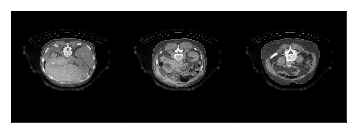

In [30]:
fused_img, _ = hf.ni_load(nii_p["fused"])
hf.plot_section_auto(fused)

In [85]:
reg_niis("blmri-art", "ct", nii_paths[patient_id], fixed_img=blmri_art, overwrite=True)

True

In [103]:
test, _ = hf.ni_load("test.nii")

In [ ]:
transform_niis(nii_p["fused-ch1"], ["ct_blmri-art"], nii_paths[patient_id], [blmri_art])

In [104]:
test.shape

(320, 250, 72)

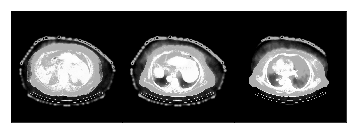

In [108]:
hf.plot_section_auto(test)

fumri_bl, _ = hf.dcm_load(dcm_paths[patient_id]['fumri-pre'])
fumri_bl = hf.reg_imgs(moving=fumri_bl, fixed=blmri_img, params=reg_params)
save_nii(fumri_bl, nii_paths[patient_id]["fumri-pre"])

In [ ]:
#spect_header = hf.get_spect_series(dcm_paths[patient_id]['spect'], just_header=True)
#rows = spect_header[('0028', '0010')].value
#cols = spect_header[('0028', '0011')].value
#frames = spect_header[('0028', '0008')].value

#print(patient_id, rows*cols*frames)
#df["voxels"] = 

In [207]:
df.to_excel(writer, sheet_name="Updated")
writer.save()

In [ ]:
for i in [3,5,14,15,16,24,28,29,34,20,21,22,23]: #os.listdir('Z:\\Isa')
    if str(df.loc[i]["SPECT"]) == "nan":
        continue
    spect_dir = 'Z:\\Isa\\spect\\' + str(df.loc[i]["SPECT"])
    for fn in os.listdir(spect_dir):
        if 'recon - ac' in fn:
            dcm_paths[patient_id]['spect'] = spect_dir + "\\" + fn
            print("found",i)
            spect_header = get_spect_series(dcm_paths[patient_id]['spect'], just_header=True)
            df.loc[i,'SPECT-Slope'] = spect_header[('0028', '1051')].value
            continue
        elif 'y90 sirs' in fn and 'ac' not in fn:
            dcm_paths[patient_id]['ct'] = spect_dir + "\\" + fn
        elif 'fused trans' in fn:
            dcm_paths[patient_id]['fused'] = spect_dir + "\\" + fn

In [91]:
mask_file = mask_paths[patient_id]["necrosis-fu"]

In [ ]:
fn_base = mask_file[:mask_file.find('.')]

with open(mask_file, 'rb') as f:
    mask = f.read()
    mask = np.fromstring(mask, dtype='uint8')
    mask = np.array(mask).reshape(orig_dims[::-1])
    mask = np.transpose(mask, (2,1,0))
    mask = mask/255
    mask, _ = hf.rescale(mask, dims)

with open(mask_file[:mask_file.find('.')]+"-scaled.ids", 'rb') as f:
    mask = round(mask) * 255
    f.write(mask)
    
mask = np.transpose(mask, (2,1,0))

importlib.reload(hf)

m, _ = hf.rescale(mask, dims)
with open(fn_base + "-scaled.ids", 'wb') as f:
    f.write(mask)

In [ ]:
hf.rescale_mask(mask_paths[patient_id]["necrosis-fu"], fumri_img.shape, blmri_bl.shape)
hf.rescale_mask(mask_paths[patient_id]["viable-tumor-fu"], fumri_img.shape, blmri_bl.shape)

In [79]:
total_dosage = np.sum(spect_img_reg)
tumor_dosage = np.sum(hf.apply_mask(spect_img_reg, mask_paths[patient_id]["tumor"]))
necro_dosage_bl = np.sum(hf.apply_mask(spect_img_reg, mask_paths[patient_id]["necrosis-bl"]))
viable_tumor_dosage_bl = np.sum(hf.apply_mask(spect_img_reg, mask_paths[patient_id]["viable-tumor-bl"]))
necro_dosage_fu = np.sum(hf.apply_mask(spect_img_reg, mask_paths[patient_id]["necrosis-fu"]))
viable_tumor_dosage_fu = np.sum(hf.apply_mask(spect_img_reg, mask_paths[patient_id]["viable-tumor-fu"]))

In [ ]:
plt.hist(spect_img)

In [ ]:
def get_dosage(df, spect_img_reg, mask):
    """Calculates dosage contained in mask by summing intensities in the registered spect_img.
    Assumes that intensity is linearly proportional to concentration."""

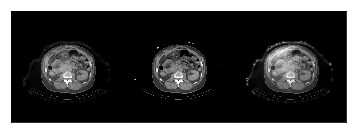

In [231]:
hf.plot_section_auto(fused_img)

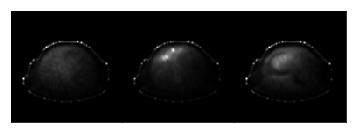

In [242]:
hf.plot_section_auto_1ch(spect_img)